<a href="https://colab.research.google.com/github/AureohDev/Tech_Lead_Exos/blob/main/Algo/Exos/TP_EDA_Projet_DataVisualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP : Projet de data visualisation

#### Analyse de données monétaires

Dans ce mini TP, nous allons réaliser une analyse graphique des données monétaire.
L’objectif est de réaliser un Jupyter Notebook présentant les caractéristiques des données.
Pour chaque question qui suit, rédiger un commentaire (en mode Markdown dans le
notebook).

## 1. Qu'est ce que la CAC40

Le **CAC40** est le principal indice boursier de la **Bourse de Paris**. L'indice **CAC40** (CAC signifiant **Cotation Assistée en Continu**) est déterminé à partir des cours de **quarante actions cotées en continu** sur le premier marché parmi les cent sociétés dont les échanges sont les plus abondants sur **Euronext Paris**, qui fait partie **d'Euronext**, la première bourse européenne. Ces sociétés, représentatives des **différentes branches d'activités**, reflètent en principe la **tendance globale de l'économie** des grandes entreprises françaises et leur liste est revue régulièrement pour maintenir cette représentativité.

## 2. Importer les librairies nécéssaire et charger les données 


In [40]:
#Libraries import for classic usage
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline   

#File import from Google Drive
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Colab Notebooks/Sources/'
data_cac = pd.read_csv(root_path+'CAC40.csv', sep = ',')

#dataset loading test
data_cac.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Unnamed: 0,Name,Date,Open,Closing_Price,Daily_High,Daily_Low,Volume
0,0,Accor,2020-04-03,22.99,23.40,23.40,22.99,67
1,1,Accor,2020-04-02,23.91,22.99,23.91,22.99,250
2,2,Accor,2020-04-01,24.10,23.83,24.10,23.83,37
3,3,Accor,2020-03-31,25.04,25.00,25.24,24.99,336
4,4,Accor,2020-03-30,26.50,25.02,26.50,24.99,415


In [41]:
#dataset column description infos
data_cac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97648 entries, 0 to 97647
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     97648 non-null  int64  
 1   Name           97648 non-null  object 
 2   Date           97648 non-null  object 
 3   Open           97418 non-null  float64
 4   Closing_Price  97646 non-null  float64
 5   Daily_High     97444 non-null  float64
 6   Daily_Low      97444 non-null  float64
 7   Volume         77195 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 6.0+ MB


## 3. Afficher les données et commentez le dataset

In [42]:
#dataset display
data_cac

,Unnamed: 0,Name,Date,Open,Closing_Price,Daily_High,Daily_Low,Volume
0,0,Accor,2020-04-03,22.99,23.40,23.40,22.99,67
1,1,Accor,2020-04-02,23.91,22.99,23.91,22.99,250
2,2,Accor,2020-04-01,24.10,23.83,24.10,23.83,37
3,3,Accor,2020-03-31,25.04,25.00,25.24,24.99,336
4,4,Accor,2020-03-30,26.50,25.02,26.50,24.99,415
...,...,...,...,...,...,...,...,...
97643,97643,Worldline SA,2014-07-04,16.22,16.28,16.29,16.22,NaN
97644,97644,Worldline SA,2014-07-03,16.12,16.28,16.28,16.12,NaN
97645,97645,Worldline SA,2014-07-02,16.22,16.17,16.32,16.17,NaN
97646,97646,Worldline SA,2014-07-01,16.42,16.25,16.55,16.25,NaN


Le Dataset comporte 97648 lignes. Ce nombre étant important il est nécéssaire de traiter les données avec un nombre plus réduit comme travaillé sur une seule entreprise par exemple.


*Pour les questions suivantes, choisir une entreprise dans le dataset dans le but de s'intéresser uniquement à cette action*

# Renault

Dans la partie suivante nous allon nous focaliser sur la société **Renault**, un acteur majeur de l'industrie automobile français.


In [3]:
#Display only unique value for Name Column
data_cac['Name'].unique()

array(['Accor', 'Air Liquide', 'Airbus ', 'ArcelorMittal', 'Atos', 'AXA',
       'BNP Paribas', 'Bouygues', 'Cap Gemini', 'Crédit Agricole',
       'Danone', 'Dassault Systèmes', 'Engie (ex GDF Suez',
       'EssilorLuxottica', 'Hermès (Hermes International', 'Kering',
       'LEGRAND', 'LOréal', 'LVMH Moet Hennessy Louis Vuitton',
       'Michelin (Compagnie Générale d Etablissements Michelin SCPA',
       'Orange', 'Pernod Ricard', 'Peugeot', 'Publicis', 'Renault',
       'SAFRAN', 'Saint-Gobain', 'Sanofi', 'Schneider Electric',
       'Société Générale (Societe Generale', 'Sodexo',
       'STMicroelectronics', 'TOTAL', 'Unibail-Rodamco',
       'Veolia Environnement', 'VINCI', 'Vivendi', 'Worldline SA'],
      dtype=object)

In [15]:
#Copy of dataset with only Renault results
data_RNO = data_cac[data_cac['Name'] == "Renault"].copy()
data_RNO

,Unnamed: 0,Name,Date,Open,Closing_Price,Daily_High,Daily_Low,Volume
62397,62397,Renault,2020-04-02,16.78,16.13,17.06,16.13,"2,987"
62398,62398,Renault,2020-04-01,16.87,16.15,17.16,16.15,"1,25"
62399,62399,Renault,2020-03-31,17.58,17.55,17.81,16.89,"2,874"
62400,62400,Renault,2020-03-30,18.39,17.64,18.39,16.85,"5,425"
62401,62401,Renault,2020-03-27,19.99,18.46,19.99,17.90,"7,125"
...,...,...,...,...,...,...,...,...
64992,64992,Renault,2010-01-08,39.70,39.00,39.70,39.00,"3,82"
64993,64993,Renault,2010-01-07,38.68,39.69,39.70,38.68,629
64994,64994,Renault,2010-01-06,38.50,39.12,39.12,38.50,"1,566"
64995,64995,Renault,2010-01-05,37.85,38.53,38.53,37.78,"1,542"



## 4. En utilisant une technique de réprésentation graphique la plus adaptée, donnez la courbe d'évolution du cours d'uverture au cours du temps

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


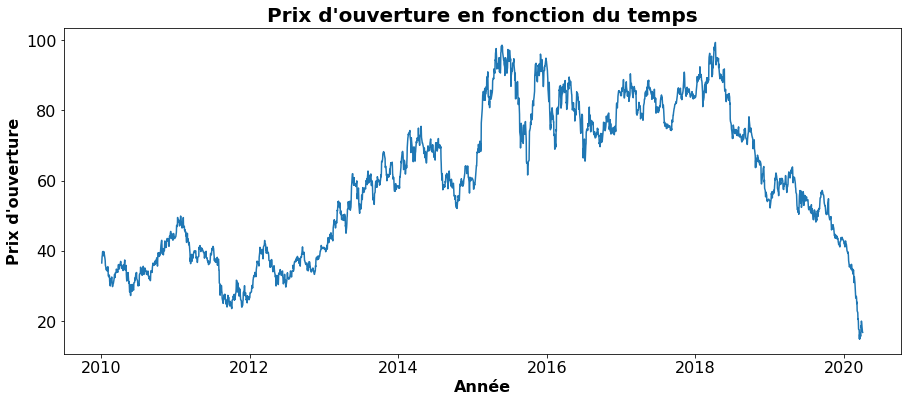

In [16]:
#Convert Date column values into datetime object type
data_RNO['Date'] = pd.to_datetime(data_RNO['Date'])
data_RNO['Year'] = data_RNO['Date'].dt.year
data_RNO['Month'] = data_RNO['Date'].dt.month

# Line Plot type graph configuration
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data_RNO['Date'], data_RNO['Open'])
ax.set_title('Prix d\'ouverture en fonction du temps', fontsize = 20, loc='center',fontdict=dict(weight='bold'))
ax.set_xlabel('Année', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Prix d\'ouverture', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

#sns.relplot(x= date_convert, y = 'Open', data= data_RNO, kind="line")

## 5. Que peut on observer ? 

On peut observer de fortes fluctuation entre 2010 et 2020 du cours de l'action de Renault (RNO). Les données commencent à environ 38.30 euro en 2010 et finissent à moins de 16.78 euro en 2020. Le max est de 100 euro environ.

Traitement des données :

## 6. Identifiez et donnez le nombre de données vides (en nombre et en %)

In [14]:
#print('Lignes avec données vides : '+str(len(data_RNO.isnull())))

#print(data_RNO.isnull().sum() * 100 / len(data_RNO))

# Empty values
data_RNO.isna().sum()


Unnamed: 0        0
Name              0
Date              0
Open              1
Closing_Price     0
Daily_High        0
Daily_Low         0
Volume           44
Year              0
Month             0
dtype: int64

Il manque seulement une valeur pour la colonne 'Open'. Il manque beaucoup d'informations pour la colonne Volume.

In [17]:
#Function for calculating empty data in percent
def empty_data(dataset, column_list):
  for column in column_list:
    percent = round((dataset[column].isnull().sum()/dataset.shape[0])*100, 2)
    print("Données manquantes pour {} : {}%".format(column, percent))

empty_data(data_RNO, ['Open','Volume'])

Données manquantes pour Open : 0.04%
Données manquantes pour Volume : 1.69%


In [20]:
def empty_data_position(dataset, column_list):
  for column in column_list:
    index_missing = dataset[pd.isnull(dataset[column])].index
    print(list(index_missing))

empty_data_position(data_RNO,['Open'])

[64336]


## 7. Quelle stratégie allez vous adopter pour traiter les données manquantes et pourquoi ?

En ce qui concerne les données faiblement représentés, il est possible de remplacer les données sans biaiser le dataset ou de supprimer ces données car ces données manquantes sont négligeables.

Ici, nous avons le choix. Ainsi, pour les données manquantes on prendra la valeure précédente.

In [21]:
data_RNO['Open'] = data_RNO['Open'].fillna(method='bfill')

En revanche pour le volume, les données manquantes sont très nombreuses. La suppression des données représentré une réduction drastique du nombre de données.

Ici, on privilégie le remplacement des données manquantes par la valeure moyenne.

In [22]:
data_RNO.describe()

,Unnamed: 0,Open,Closing_Price,Daily_High,Daily_Low,Year,Month
count,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000
mean,63696.500000,59.524719,59.525573,60.142442,58.908731,2014.622308,6.381923
std,750.699674,20.711345,20.751167,20.872593,20.592854,2.966992,3.452183
min,62397.000000,14.900000,14.850000,15.800000,12.860000,2010.000000,1.000000
25%,63046.750000,39.572500,39.537500,39.862500,39.107500,2012.000000,3.000000
50%,63696.500000,59.695000,59.580000,60.240000,58.995000,2015.000000,6.000000
75%,64346.250000,77.390000,77.402500,78.252500,76.565000,2017.000000,9.000000
max,64996.000000,99.350000,99.560000,100.020000,98.230000,2020.000000,12.000000


On s'aperçoit que la donnée Volume n'est pas numérique, il faut donc changer le "type"

In [25]:
#Volume column type change
data_RNO['Volume'] = pd.to_numeric(data_RNO['Volume'],errors='coerce')
data_RNO.describe()

,Unnamed: 0,Open,Closing_Price,Daily_High,Daily_Low,Volume,Year,Month
count,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,1116.000000,2600.000000,2600.000000
mean,63696.500000,59.524719,59.525573,60.142442,58.908731,461.696237,2014.622308,6.381923
std,750.699674,20.711345,20.751167,20.872593,20.592854,281.530239,2.966992,3.452183
min,62397.000000,14.900000,14.850000,15.800000,12.860000,1.000000,2010.000000,1.000000
25%,63046.750000,39.572500,39.537500,39.862500,39.107500,221.750000,2012.000000,3.000000
50%,63696.500000,59.695000,59.580000,60.240000,58.995000,443.500000,2015.000000,6.000000
75%,64346.250000,77.390000,77.402500,78.252500,76.565000,691.500000,2017.000000,9.000000
max,64996.000000,99.350000,99.560000,100.020000,98.230000,999.000000,2020.000000,12.000000


In [27]:
#Data always empty
data_RNO.isna().sum()

Unnamed: 0          0
Name                0
Date                0
Open                0
Closing_Price       0
Daily_High          0
Daily_Low           0
Volume           1484
Year                0
Month               0
dtype: int64

In [30]:
#Mean value 
mean_value=data_RNO['Volume'].mean()
#Fill empty data
data_RNO['Volume'].fillna(value=data_RNO['Volume'].mean(), inplace=True)
data_RNO.isna().sum()

Unnamed: 0       0
Name             0
Date             0
Open             0
Closing_Price    0
Daily_High       0
Daily_Low        0
Volume           0
Year             0
Month            0
dtype: int64

## 8. En utilisant une technique de représentation graphique la plus adaptée, donnez la courbe d’évolution du volume d’échanges journaliers au cours du temps.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


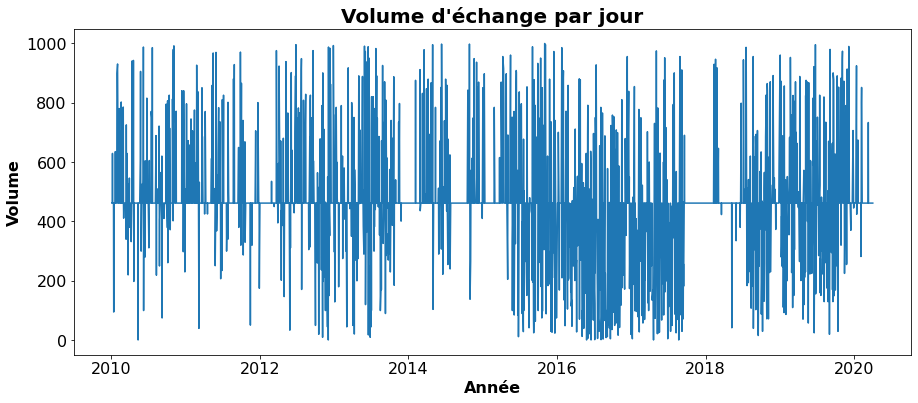

In [31]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data_RNO['Date'], data_RNO['Volume'] )

ax.set_title('Volume d\'échange par jour', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Année', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Volume', fontsize = 16, fontdict=dict(weight='bold'))

plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

Le graphique est très peu lisible car il trace une évolution journalière. De plus, on distingue une certaine droite autour de 500, ceci est du au remplissage par la valeure moyenne. Il sera préférable de tracer l'évolution avec une échelle de temps plus importante.

##9. En utilisant une technique de représentation graphique la plus adaptée, donnez lacourbe d’évolution du volume d’échanges mensuel au cours du temps. [utiliser la fonction .resample('1M') sur la date]



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


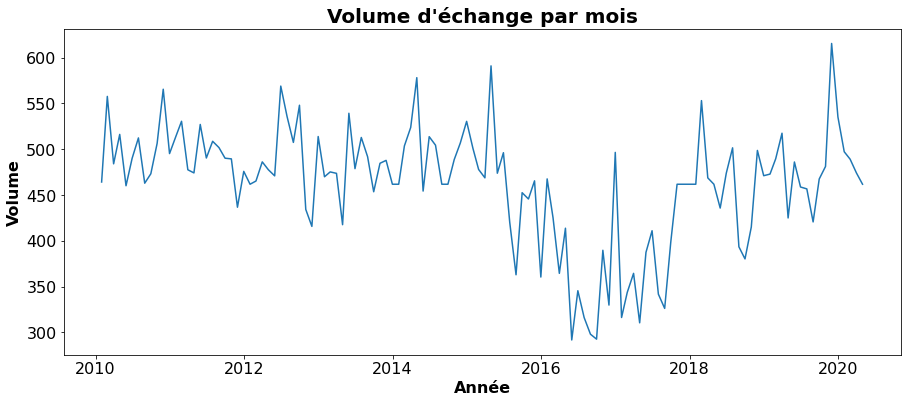

In [32]:
#New dataframe based on month
y = data_RNO[['Date','Volume']].copy()
y.set_index('Date', inplace=True)
y.index = pd.to_datetime(y.index)

# Resample on month
y = y.resample('1M').mean()
y['Date'] = y.index

# Graph display
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(y['Date'], y['Volume'] )

ax.set_title('Volume d\'échange par mois', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Année', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Volume', fontsize = 16, fontdict=dict(weight='bold'))

plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

## 10. Comparez les 2 courbes, que pouvez vous dire ?

Le graphique est beaucoup plus lisible. Le volume est oscille en fonction des mois, entre 300 et 550. 

> #### A retenir 
- Une petite période: le signal contient beaucoup de bruit, mais on a beaucoup d'infos
- Grande période : signal peu bruyant du coup plus lisible, mais moins d'informations

## 11. Qu'est ce que la saisonnalité ?

Dans les données avec les dates, il est possible de détecter des cycles sur les périodes de temps.

In [33]:
# Year List
data_RNO['Year'].unique()

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010])

## 12. En utilisant une technique de représentation graphique la plus adaptée, donnez toutes les courbes d’évolution du prix au cours du temps exprimé par mois pour chaque année.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


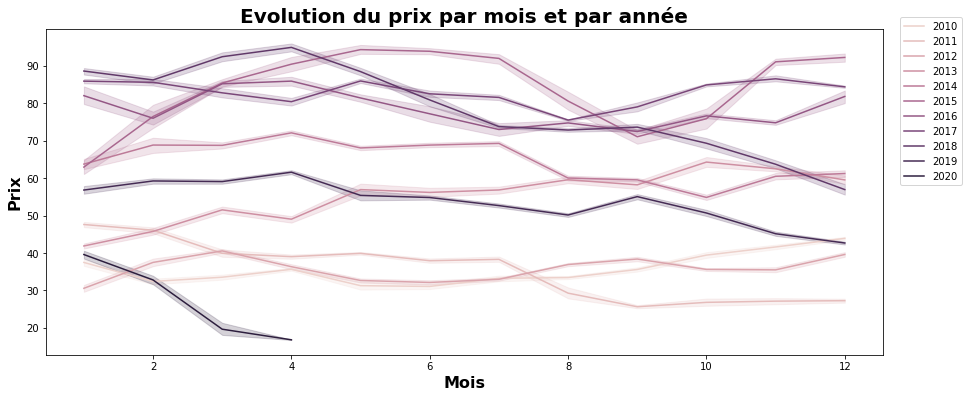

In [39]:
snfig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data_RNO['Month'], data_RNO['Open'], hue = data_RNO['Year'])
ax.set_title('Evolution du prix par mois et par année', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Mois', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Prix', fontsize = 16, fontdict=dict(weight='bold'))
ax.legend(labels = [str(2010+i) for i in range(11)], bbox_to_anchor=(1.1, 1.05))


##13. En utilisant une technique de représentation graphique la plus adaptée, donnez la courbe d’évolution du prix au cours du temps exprimé par années, en affichant les valeurs médianes, et extrêmes.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Prix')

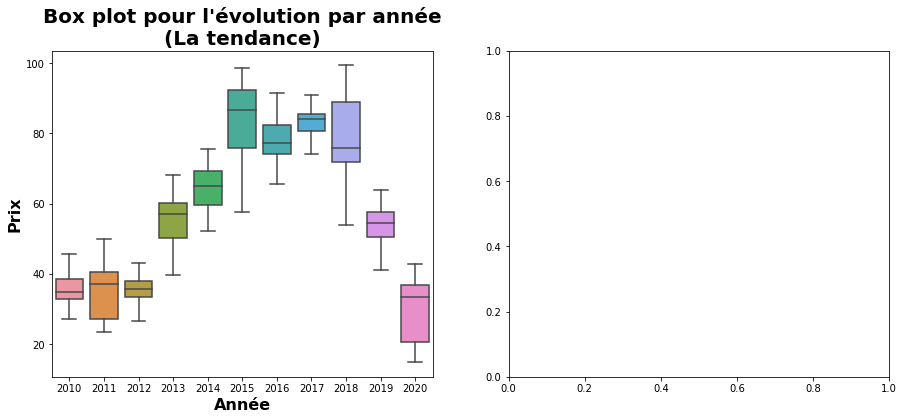

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(data_RNO['Year'], data_RNO['Open'], ax=ax[0])
ax[0].set_title('Box plot pour l\'évolution par année\n(La tendance)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Année', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('Prix', fontsize = 16, fontdict=dict(weight='bold'))

##14. En utilisant une technique de représentation graphique la plus adaptée, donnez la courbe d’évolution du prix au cours du temps exprimé par mois, en affichant les valeurs médianes, et extrêmes.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Prix')

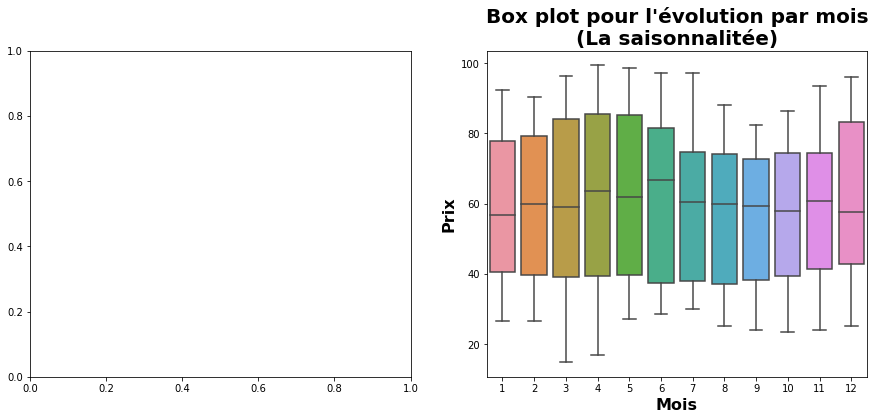

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(data_RNO['Month'], data_RNO['Open'], ax=ax[1])
ax[1].set_title('Box plot pour l\'évolution par mois\n(La saisonnalitée)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Mois', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('Prix', fontsize = 16, fontdict=dict(weight='bold'))